<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/delivery_time_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data=pd.read_csv("/content/delivery_time (1).csv")

In [6]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
#correletion 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


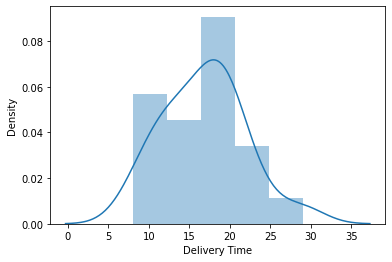

In [9]:
sns.distplot(data['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


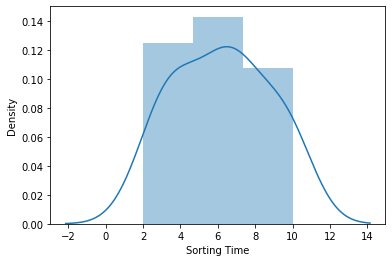

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
data_1 = data.rename(columns = {'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, inplace = False)


In [12]:
#fitting regression model
model=smf.ols("delivery_time~sorting_time",data=data_1).fit()

In [13]:
model

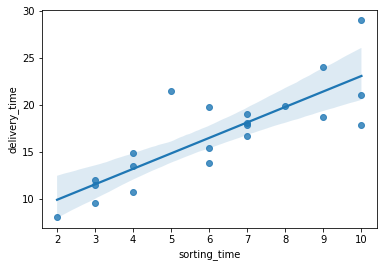

In [14]:
sns.regplot(x="sorting_time",y="delivery_time",data=data_1);

In [15]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
#predict for new delivery time
newdata=pd.Series([1,8,10])

In [19]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [20]:
model.predict(data_pred)

0     8.231754
1    19.774893
2    23.072933
dtype: float64

In [21]:
import matplotlib.pyplot as plt

                     0          1
Intercept     1.657007  11.508461
sorting_time  0.910425   2.387615


Text(0, 0.5, 'delivery_time')

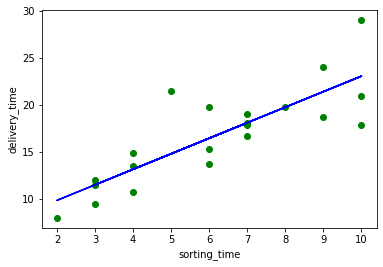

In [22]:
# Transforming variables for accuracy
model2 = smf.ols('delivery_time~sorting_time',data=data_1).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(data_1['sorting_time']))
pred2.corr(data_1.delivery_time)
# pred2 = model2.predict(wcat.iloc[:,0])
pred2
plt.scatter(x=data_1['sorting_time'],y=data_1['delivery_time'],color='green');plt.plot(data_1['sorting_time'],pred2,color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')


                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


Text(0, 0.5, 'Standardized Residual')

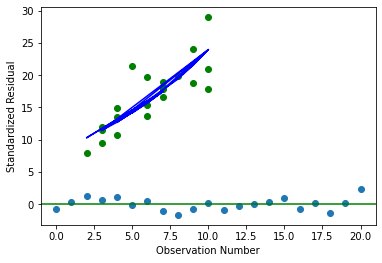

In [23]:
# Exponential transformation
import numpy as np
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=data_1).fit()
model3.params
model3.summary()
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(data_1['sorting_time']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3
pred3.corr(data_1.delivery_time)
plt.scatter(x=data_1['sorting_time'],y=data_1['delivery_time'],color='green');plt.plot(data_1.sorting_time,np.exp(pred_log),color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')
resid_3 = pred3-data_1.delivery_time
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

(array([1., 1., 5., 2., 5., 3., 1., 1., 1., 1.]),
 array([-1.83966835, -1.43014075, -1.02061315, -0.61108555, -0.20155795,
         0.20796966,  0.61749726,  1.02702486,  1.43655246,  1.84608006,
         2.25560766]),
 <a list of 10 Patch objects>)

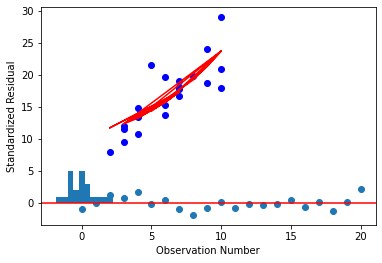

In [30]:
# Quadratic model
data_1["sorting_time_Sq"] = data_1.sorting_time*data_1.sorting_time
model_quad = smf.ols("delivery_time~sorting_time_Sq",data=data_1).fit()
model_quad.params
model_quad.summary()
#pred_quad = model_quad.predict(data.YearsExperience_Sq)
pred_quad = model_quad.predict(pd.DataFrame(data_1['sorting_time_Sq']))

model_quad.conf_int(0.05) # 
plt.scatter(data_1.sorting_time,data_1.delivery_time,c="b");plt.plot(data_1.sorting_time,pred_quad,"r")


plt.scatter(np.arange(21),model_quad.resid_pearson);plt.axhline(y=0,color='red');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

plt.hist(model_quad.resid_pearson) # histogram for residual values